# Exploratory Data Analysis: Rossmann Pharmaceuticals Sales Forecasting

This notebook contains the exploratory data analysis for the Rossmann Pharmaceuticals sales forecasting project. We'll analyze the data to understand customer purchasing behavior and prepare it for modeling.

In [18]:
import sys
sys.path.append('../src')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

if 'data_loader' in sys.modules:
    del sys.modules['data_loader']
if 'data_cleaner' in sys.modules:
    del sys.modules['data_cleaner']
if 'eda_analyzer' in sys.modules:
    del sys.modules['eda_analyzer']
if 'sales_analyzer' in sys.modules:
    del sys.modules['sales_analyzer']
if 'utils' in sys.modules:
    del sys.modules['utils']
    
from data_loader import DataLoader
from data_cleaner import DataCleaner
from eda_analyzer import EDAAnalyzer
from sales_analyzer import SalesAnalyzer
import utils as ut

%matplotlib inline
plt.style.use('seaborn-v0_8-dark')

# Exploratory Data Analysis

## 1. Data Loading and Cleaning

In [19]:
# Load the data
loader = DataLoader()
loader.load_data('../resources/Data/train.csv', '../resources/Data/test.csv', '../resources/Data/store.csv')
merged_train, merged_test, store = loader.merge_data()

# Clean the data
cleaner = DataCleaner()
cleaned_train = cleaner.preprocess_data(merged_train)
cleaned_test = cleaner.preprocess_data(merged_test)
cleaned_store = cleaner.preprocess_data(store)


print("Train data shape:", cleaned_train.shape)
print("Test data shape:", cleaned_test.shape)
print("\nTrain data columns:", cleaned_train.columns.tolist())
print("\nTrain data info:")
cleaned_train.info()

2024-09-20 17:25:40,612 - INFO - Loading data...


e:\Studies\tenx\w4\notebooks\../src\data_loader.py:23: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  self.train_data = pd.read_csv(train_path)
2024-09-20 17:25:41,649 - INFO - Data loaded successfully.
2024-09-20 17:25:41,650 - INFO - Merging data...
2024-09-20 17:25:41,953 - INFO - Data merged successfully.
2024-09-20 17:25:41,955 - INFO - Preprocessing data...
2024-09-20 17:25:41,955 - INFO - Handling missing values...
2024-09-20 17:25:46,140 - INFO - Missing values handled successfully.
2024-09-20 17:25:46,309 - INFO - Handling outliers using IQR method...
2024-09-20 17:25:47,125 - INFO - Outliers handled successfully.
2024-09-20 17:25:47,125 - INFO - Data preprocessing completed successfully.
2024-09-20 17:25:47,125 - INFO - Preprocessing data...
2024-09-20 17:25:47,125 - INFO - Handling missing values...
2024-09-20 17:25:47,309 - INFO - Missing values handled successfully.
2024-09-20 17:25:47,309 - INFO - Handling outliers us

Train data shape: (1017209, 18)
Test data shape: (41088, 17)

Train data columns: ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

Train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  float64
 1   DayOfWeek                  1017209 non-null  float64
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  float64
 4   Customers                  1017209 non-null  float64
 5   Open                       1017209 non-null  float64
 6   Promo                      1017209 non-null

## Basic Distribution, Time Series and Descriptive Statistics

In [20]:
ut.plot_distribution(cleaned_train, 'Sales', 'Distribution of Sales', 'Sales', 'Frequency', '../notebooks/figures/sales_distribution.png')
ut.plot_correlation_heatmap(cleaned_train, 'Correlation Heatmap', '../notebooks/figures/correlation_heatmap.png')
ut.plot_time_series(cleaned_train, 'Date', 'Sales', 'Sales Over Time', 'Date', 'Sales', '../notebooks/figures/sales_time_series.png')

sales_summary = ut.calculate_summary_statistics(cleaned_train, 'Sales')
print("Sales Summary Statistics:", sales_summary)

2024-09-20 17:26:02,642 - INFO - Distribution plot saved to ../notebooks/sales_distribution.png
2024-09-20 17:26:04,440 - INFO - Correlation heatmap saved to ../notebooks/correlation_heatmap.png
2024-09-20 17:26:05,024 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 17:26:05,759 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 17:26:45,717 - INFO - Time series plot saved to ../notebooks/sales_time_series.png


Sales Summary Statistics: {'mean': np.float64(5690.812275550059), 'median': np.float64(5744.0), 'std': np.float64(3595.8074886587183), 'min': np.float64(0.0), 'max': np.float64(14049.5), 'q1': np.float64(3727.0), 'q3': np.float64(7856.0)}


## 2. Distribution Analysis: Promotions in Training and Test Sets

2024-09-20 17:02:05,896 - INFO - Analyzing promotions distribution...


<Figure size 1000x600 with 0 Axes>

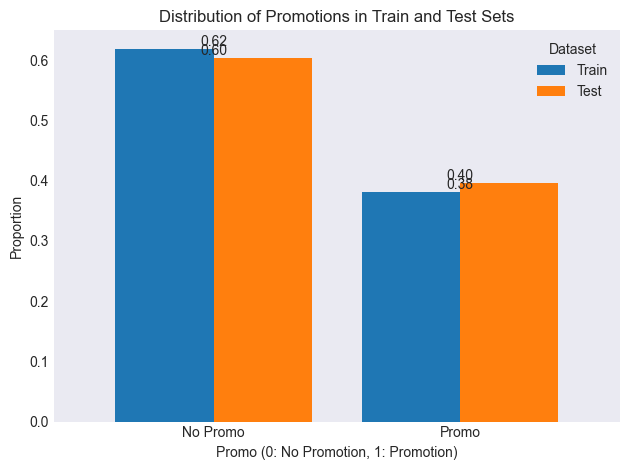

2024-09-20 17:02:06,280 - INFO - Promotions analysis completed.


In [4]:
analyzer = EDAAnalyzer(cleaned_train, cleaned_test)
analyzer.analyze_promotions()
plt.show()

The bar plot above shows the distribution of promotions in both the training and test sets. This allows us to compare if promotions are distributed similarly in both datasets, ensuring a fair evaluation of our model.

## 3. Holiday Effects on Sales

2024-09-20 17:02:06,286 - INFO - Analyzing holiday effects...


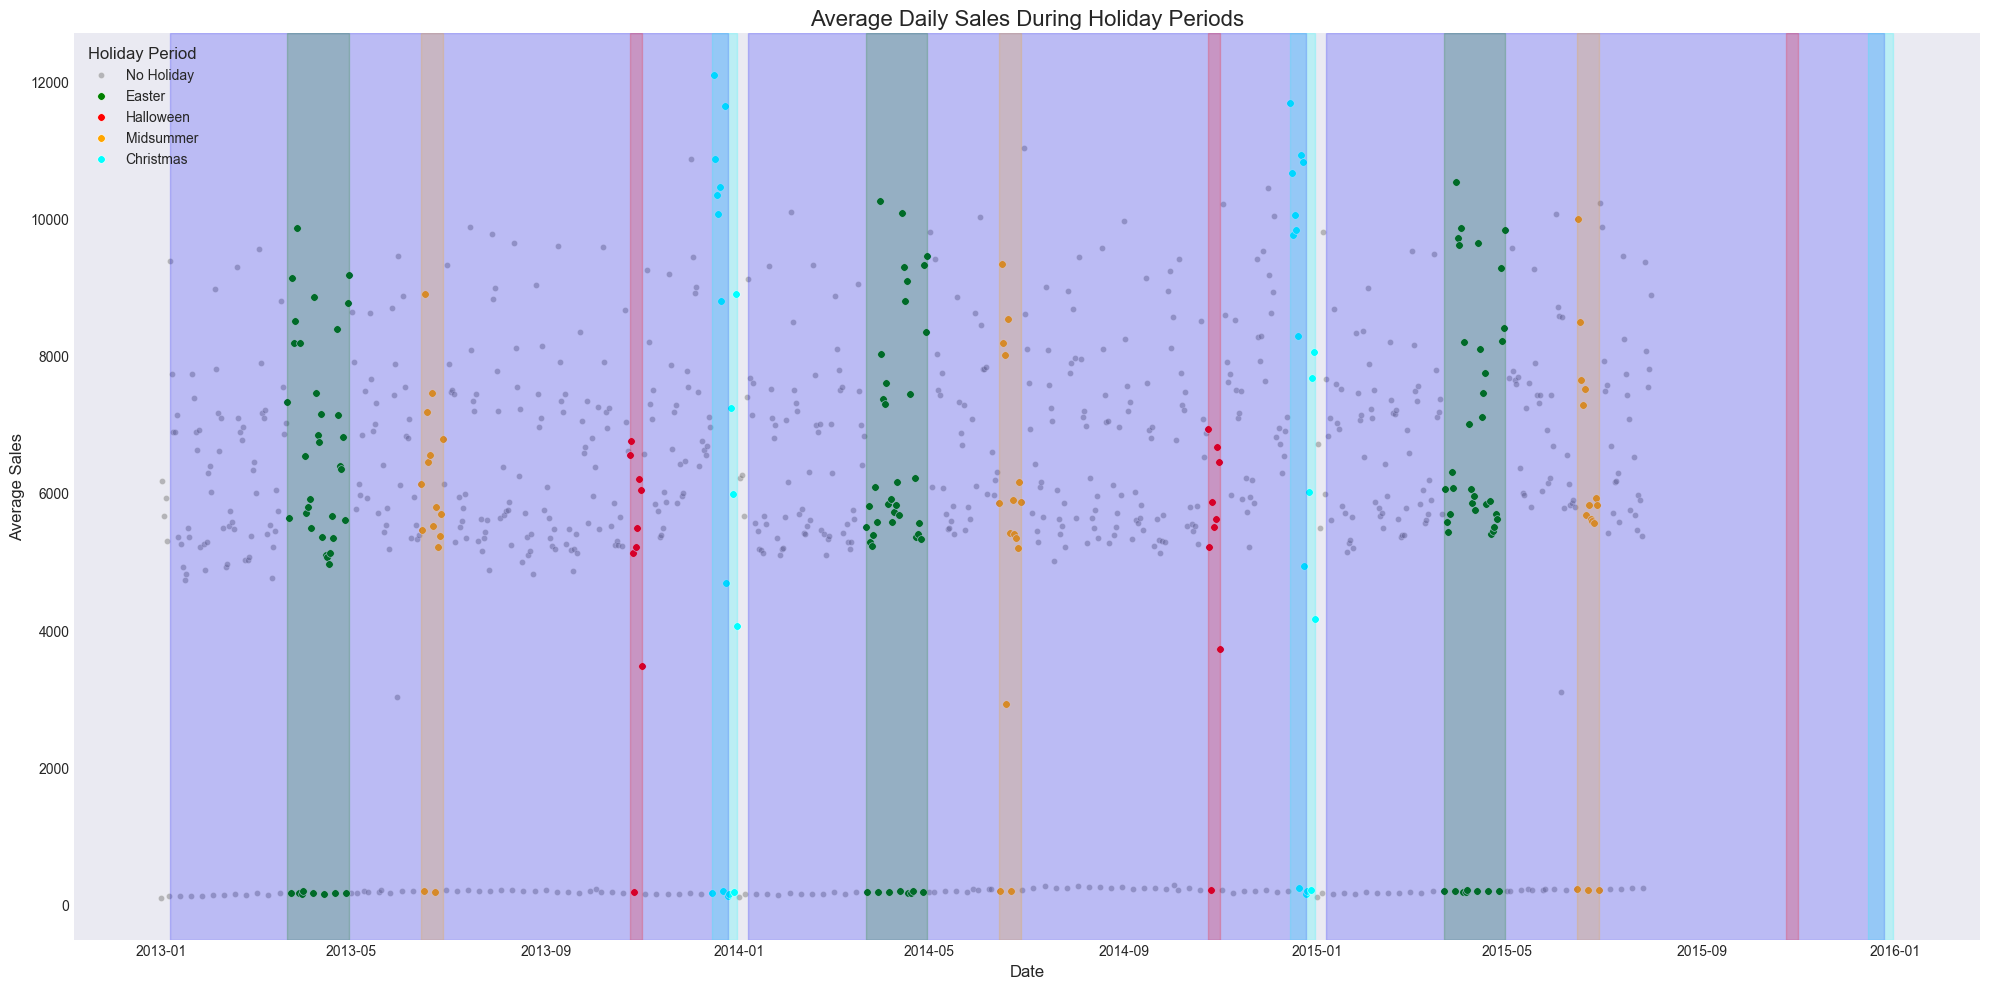

2024-09-20 17:02:08,178 - INFO - Holiday effects analysis completed.


In [5]:
analyzer.analyze_holiday_effects()
plt.show()

This line plot illustrates the average sales during different state holidays. It helps us understand how holidays impact sales patterns, which can inform promotional strategies around these periods.

## 4. Seasonality in Purchasing Behaviors

2024-09-20 17:02:08,201 - INFO - Analyzing seasonality...


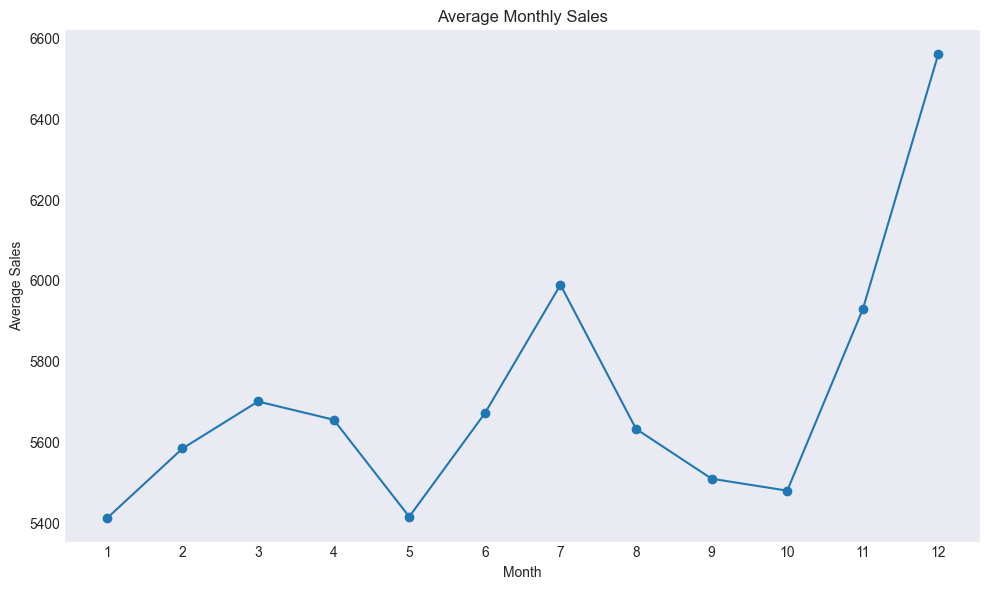

2024-09-20 17:02:08,711 - INFO - Seasonality analysis completed.


In [6]:
analyzer.analyze_seasonality()
plt.show()

The line plot above shows average monthly sales, helping us identify any seasonal patterns in purchasing behavior. This information can be crucial for inventory management and promotional planning.

## 5. Correlation between Sales and Number of Customers

2024-09-20 17:02:08,729 - INFO - Analyzing sales and customers correlation...


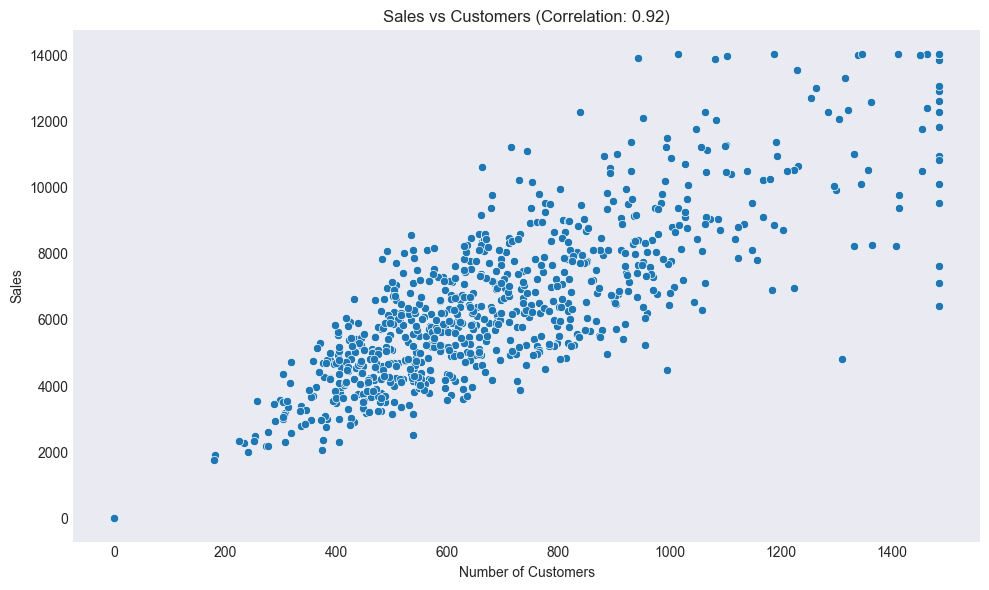

2024-09-20 17:02:09,260 - INFO - Sales and customers correlation: 0.92


In [7]:
analyzer.analyze_sales_customers_correlation()
plt.show()

This scatter plot visualizes the relationship between sales and the number of customers. The correlation coefficient provides a quantitative measure of this relationship, which can help in understanding how customer traffic relates to sales performance.

## 6. Promotional Impact on Sales and Customers

2024-09-20 17:02:09,280 - INFO - Analyzing promotional impact...


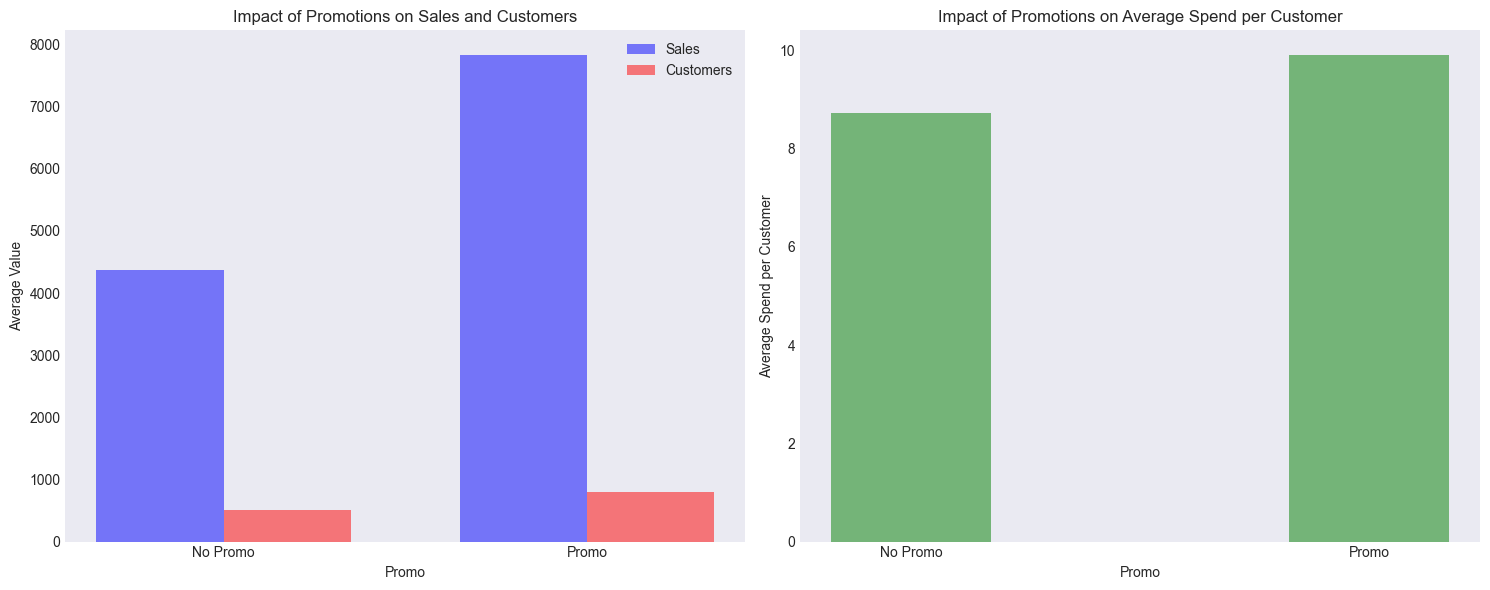

2024-09-20 17:02:09,842 - INFO - Promotional impact analysis completed.


Impact of Promotions:
Sales increase: 79.41%
Customer increase: 57.99%
Average spend per customer increase: 13.56%


In [8]:
analyzer.analyze_promotional_impact()
plt.show()

This bar plot compares average sales and customer numbers during promotional and non-promotional periods. It helps us understand how promotions influence both sales and customer traffic, which is crucial for optimizing promotional strategies.

## 7. Additional Analyses

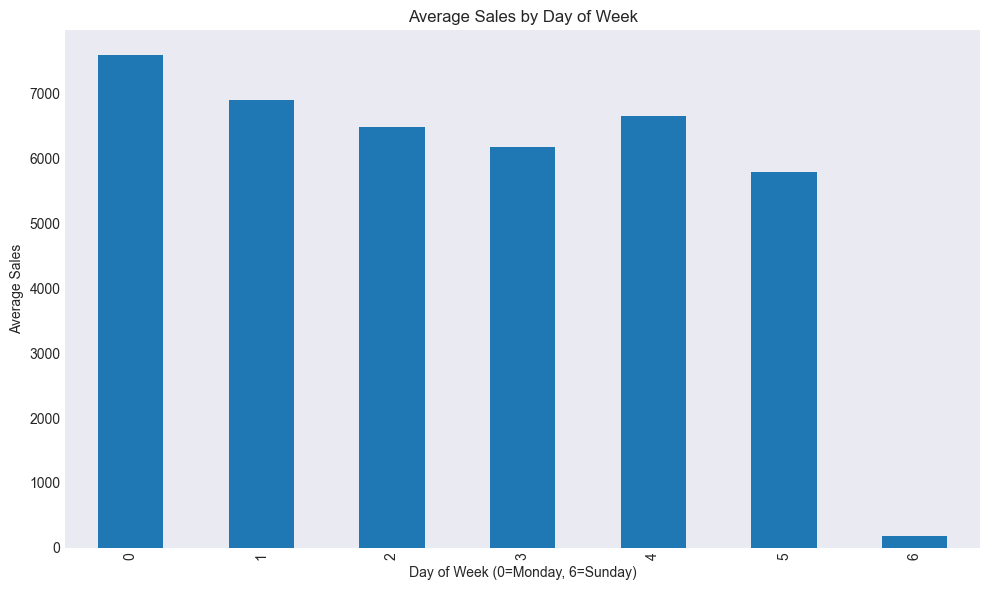

In [9]:
# Analyze sales patterns by day of the week
cleaned_train['DayOfWeek'] = pd.to_datetime(cleaned_train['Date']).dt.dayofweek
day_sales = cleaned_train.groupby('DayOfWeek')['Sales'].mean().reindex(range(7))

plt.figure(figsize=(10, 6))
day_sales.plot(kind='bar')
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()

This bar plot shows average sales by day of the week, helping us identify any weekly patterns in sales.

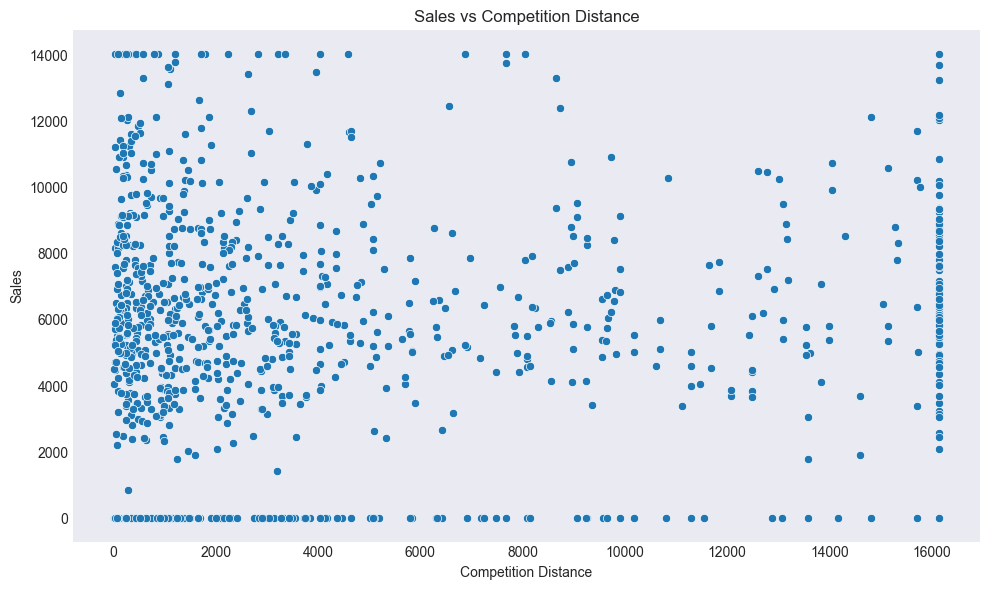

In [10]:
# Analyze the impact of competition distance on sales
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=cleaned_train.sample(n=1000))
plt.title('Sales vs Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

This scatter plot visualizes the relationship between sales and the distance to the nearest competitor, helping us understand how competitor proximity affects sales.

## 8. Summary and Key Findings EDA

Based on our exploratory data analysis, we can draw the following conclusions:

1. Promotion Distribution: [Insert findings about promotion distribution in train and test sets]
2. Holiday Effects: [Insert findings about how holidays affect sales]
3. Seasonality: [Insert findings about seasonal patterns in sales]
4. Sales and Customers Correlation: [Insert findings about the relationship between sales and number of customers]
5. Promotional Impact: [Insert findings about how promotions affect sales and customer numbers]
6. Weekly Sales Patterns: [Insert findings about sales patterns by day of week]
7. Competition Impact: [Insert findings about how competition distance affects sales]

These insights will be valuable for building our sales forecasting model and for informing business strategies related to promotions, holiday planning, and competitive positioning.

# Sales Analysis

## 1. Promo Optimization

2024-09-20 17:02:10,709 - INFO - Analyzing promotion effectiveness...
2024-09-20 17:02:13,440 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-20 17:02:13,440 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


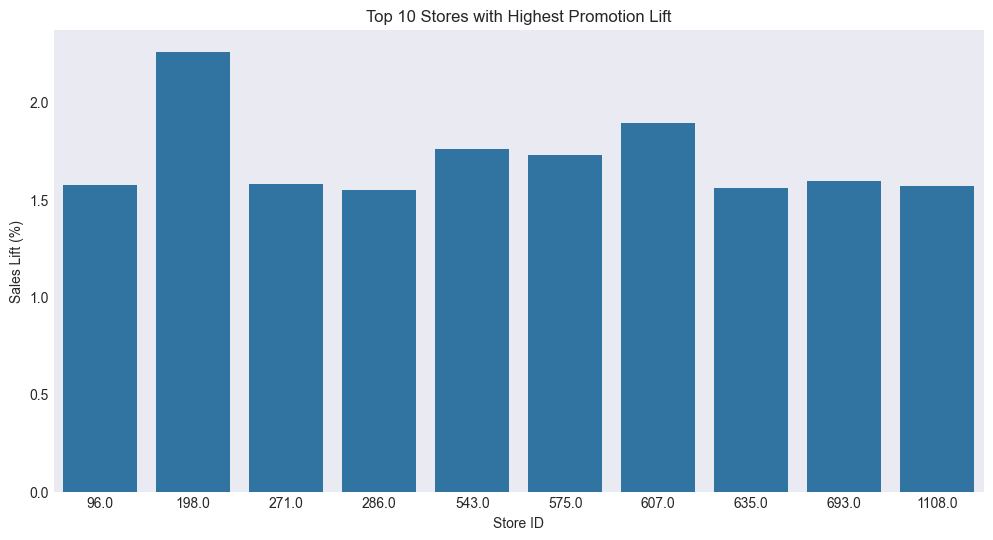

2024-09-20 17:02:13,723 - INFO - Top 5 stores for promo effectiveness: {198.0: 2.2581947130883298, 607.0: 1.889831266415439, 543.0: 1.7590638056346282, 575.0: 1.727914622860851, 693.0: 1.5935011020085175}


Store
198.0     2.258195
607.0     1.889831
543.0     1.759064
575.0     1.727915
693.0     1.593501
271.0     1.577159
96.0      1.574538
1108.0    1.565837
635.0     1.555817
286.0     1.545985
dtype: float64

In [11]:
sa = SalesAnalyzer(cleaned_train)

# Run promo optimization analysis
top_stores = sa.analyze_promo_effectiveness()
top_stores


## 2. Store Opening Times Analysis

2024-09-20 17:02:13,739 - INFO - Analyzing store opening times...


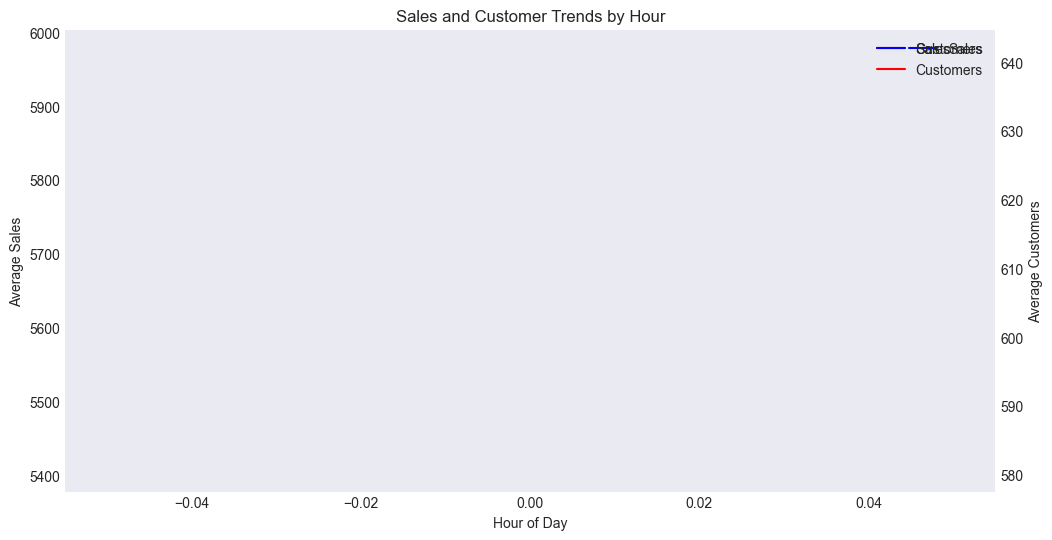

2024-09-20 17:02:14,373 - INFO - Store opening times analysis completed.


,Sales,Customers
Hour,,
0,5690.812276,611.155962


In [12]:

# Run store opening times analysis
hourly_data = sa.analyze_store_opening_times()
hourly_data


## 3. Weekday vs. Weekend Sales Analysis

2024-09-20 17:02:14,407 - INFO - Analyzing weekday vs weekend sales...


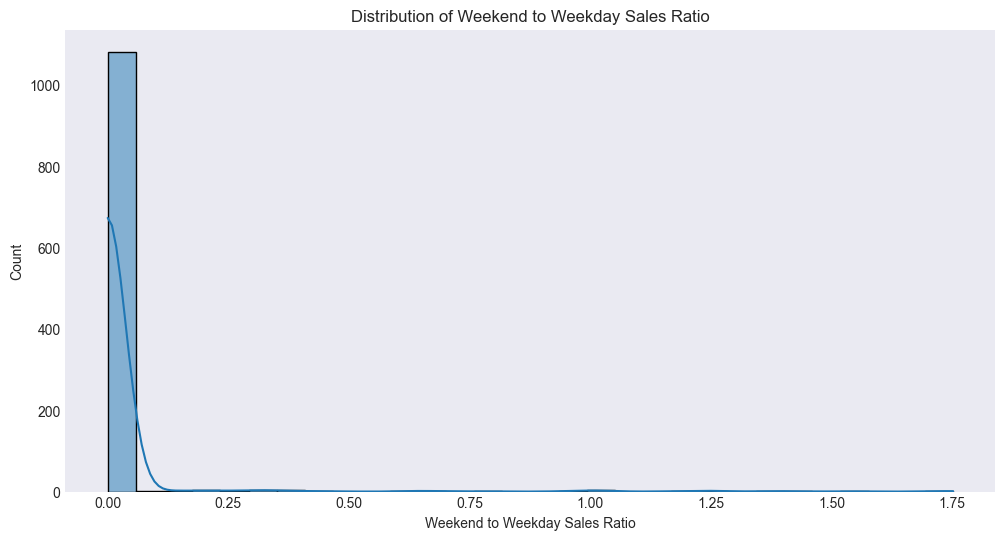

2024-09-20 17:02:15,205 - INFO - Average weekend to weekday sales ratio: 0.02


IsWeekend,0,1,WeekendRatio
Store,,,
1.0,4600.066832,0.0,0.0
2.0,4806.754950,0.0,0.0
3.0,6689.488861,0.0,0.0
4.0,9310.975248,0.0,0.0
5.0,4508.438119,0.0,0.0
...,...,...,...
1111.0,5063.212871,0.0,0.0
1112.0,9522.489480,0.0,0.0
1113.0,6428.235149,0.0,0.0


In [13]:

# Run weekday vs weekend sales analysis
sales_patterns = sa.analyze_weekday_weekend_sales()
sales_patterns


## 4. Assortment Type Analysis

2024-09-20 17:02:15,221 - INFO - Analyzing assortment impact on sales...


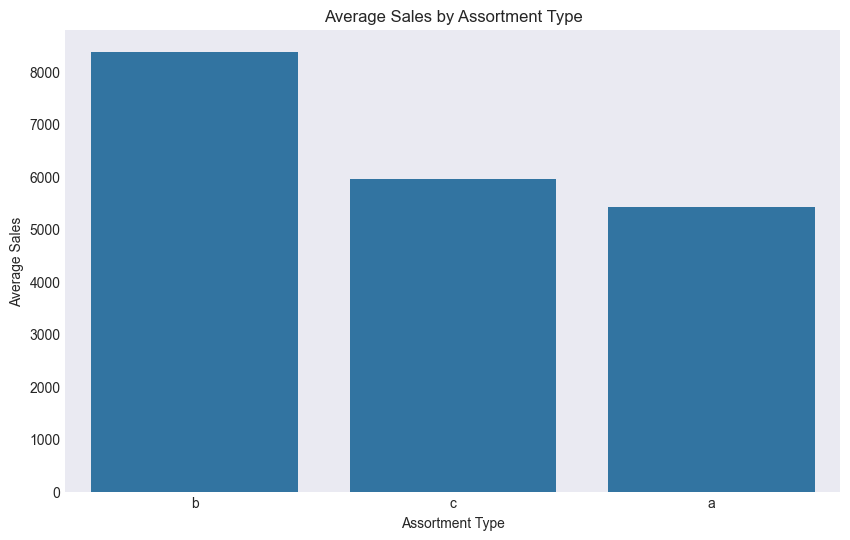

2024-09-20 17:02:15,539 - INFO - Assortment sales ranking: {'b': 8373.314866168315, 'c': 5954.932500477231, 'a': 5417.717467833918}


Assortment
b    8373.314866
c    5954.932500
a    5417.717468
Name: Sales, dtype: float64

In [14]:

# Run assortment type analysis
assortment_sales = sa.analyze_assortment_impact()
assortment_sales


## 5. Competitor Proximity Analysis

2024-09-20 17:02:15,554 - INFO - Analyzing competitor proximity impact...
e:\Studies\tenx\w4\notebooks\../src\sales_analyzer.py:145: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_by_distance = self.data.groupby('CompetitionDistanceBin')['Sales'].mean()
e:\Studies\tenx\w4\notebooks\../src\sales_analyzer.py:151: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city_centre_impact = self.data[self.data['Store'].isin(city_centre_stores)].groupby('CompetitionDistanceBin')['Sales'].mean()


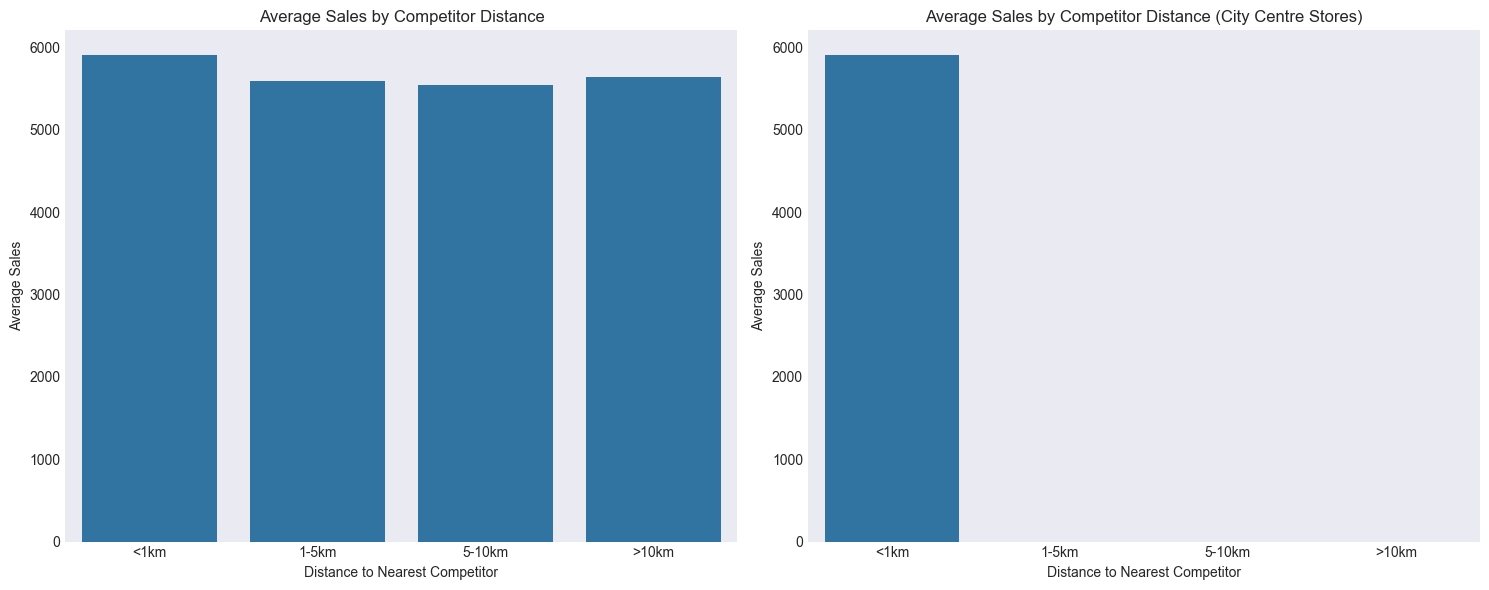

2024-09-20 17:02:16,370 - INFO - Sales by competitor distance: {'<1km': 5911.864422539219, '1-5km': 5596.504822351682, '5-10km': 5544.436648242976, '>10km': 5645.062455457806}
2024-09-20 17:02:16,370 - INFO - City centre stores sales by competitor distance: {'<1km': 5911.864422539219, '1-5km': nan, '5-10km': nan, '>10km': nan}


(CompetitionDistanceBin
 <1km      5911.864423
 1-5km     5596.504822
 5-10km    5544.436648
 >10km     5645.062455
 Name: Sales, dtype: float64,
 CompetitionDistanceBin
 <1km      5911.864423
 1-5km             NaN
 5-10km            NaN
 >10km             NaN
 Name: Sales, dtype: float64)

In [15]:

# Run competitor proximity analysis
sales_by_distance, city_centre_impact = sa.analyze_competitor_proximity()
sales_by_distance, city_centre_impact


## 6. New Competitor Impact Analysis

2024-09-20 17:02:16,396 - INFO - Analyzing new competitor impact...


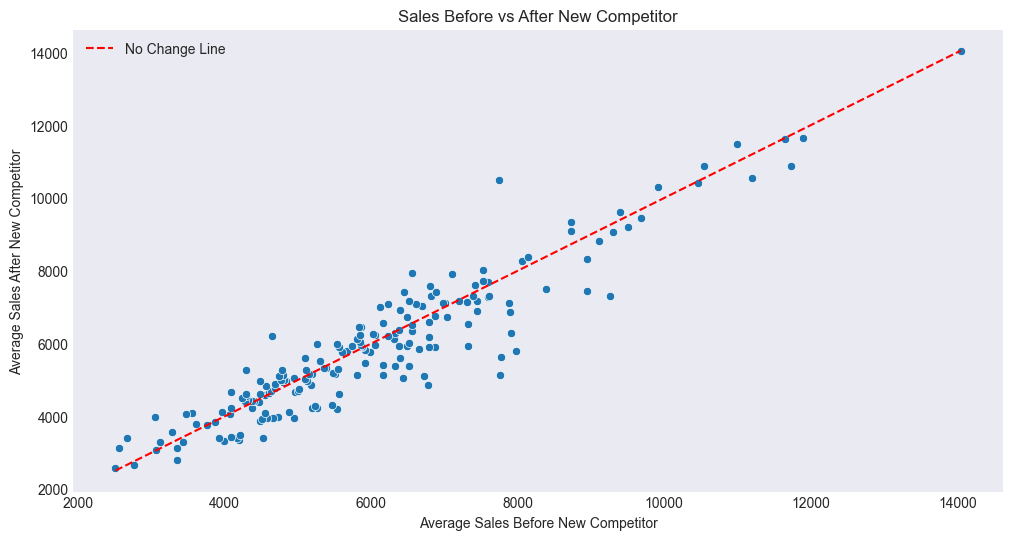

2024-09-20 17:02:18,704 - INFO - Average sales change after new competitor: -1.78%


,Store,BeforeSales,AfterSales,SalesChange
147,882.0,7752.422222,5142.662559,-0.336638
123,685.0,6770.498355,4861.720219,-0.281926


In [16]:

# Run new competitor impact analysis
impact_df = sa.analyze_new_competitor_impact()
impact_df.head(2)


## 7. Summary and Key Findings Sales Analysis

Based on our exploratory data analysis, we can draw the following conclusions:

1. Promotion Distribution: [Insert findings about promotion distribution in train and test sets]
2. Holiday Effects: [Insert findings about how holidays affect sales]
3. Seasonality: [Insert findings about seasonal patterns in sales]
4. Sales and Customers Correlation: [Insert findings about the relationship between sales and number of customers]
5. Promotional Impact: [Insert findings about how promotions affect sales and customer numbers]
6. Weekly Sales Patterns: [Insert findings about sales patterns by day of week]
7. Competition Impact: [Insert findings about how competition distance affects sales]

These insights will be valuable for building our sales forecasting model and for informing business strategies related to promotions, holiday planning, and competitive positioning.